In [17]:
# this section initializes the code

%reset -f

import numpy as np                    # matrices & etc
from matplotlib import pyplot as plt  # general plotting 
from math import exp, pi, sin, cos, tan, sqrt, floor, log10, nan   # math functions
import scipy.linalg as la             # linear algebra functions
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import scipy.signal as sg
import scipy.stats as st
import scipy.special as sp
import matplotlib
import matplotlib.colors as colors

# function to make a numpy N-by-1 column vector
# c=eda_cvec(v1, v2, ...) from a list of several
# array-like entities v1, v2, including a number
# a list of numbers, a tuple of numbers, an N-by-0 np array
# and a N-by-1 np array. The function
# also insures that, if v is an np array, that
# c is a copy, as contrasted to a view, of it
# It promotes integers to floats, and integers
# and floats to complex, by context.
# This version concatenates many argments,
# whereas c=eda_cvec1(v1) takes just one argiment.
# I recommend always using eda_cvec(v1, v2, ...)
def gda_cvec(*argv):
    t = int;
    Nt = 0;
    for a in argv:
        v = gda_cvec1(a);
        N,M = np.shape(v);
        Nt = Nt + N;
        if( N==0 ):
            continue; # skip vector of zero length
        if (t==int) and isinstance(v[0,0],float):
            t=float;
        elif isinstance(v[0,0],complex):
            t=complex;
    w = np.zeros((Nt,1),dtype=t);
    Nt = 0;
    for a in argv:
        v = gda_cvec1(a);
        N,M = np.shape(v);
        w[Nt:Nt+N,0:1] = v;  # patch 20230418 was #w[Nt:Nt+N,0] = v[0:N,0];
        Nt = Nt + N;
    return w;

# function to make a numpy N-by-1 column vector
# c=gda_cvec1(v) from entity v that is array-like,
# including a number, a list of numbers, a tuple
# of numbers, an N-by-0 np array and a N-by1 np array.
# It promotes integers to floats, and integers
# and floats to complex, by context. The function
# also insures that, if v is an np array, that
# c is a copy, as contrasted to a view, of it.
# This version takes just one input argment.
# whereas c=gda_cvec(v1,v2,...) concatenates
# many argiments.
def gda_cvec1(v):
    if isinstance(v, int) or isinstance(v, np.int32):
        w = np.zeros((1,1),dtype=int);
        w[0,0] = v;
        return w;
    elif isinstance(v, float):
        w = np.zeros((1,1),dtype=float);
        w[0,0] = v;
        return w;
    elif isinstance(v, complex):
        w = np.zeros((1,1),dtype=complex);
        w[0,0] = v;
        return w;
    elif isinstance(v, np.ndarray):
        s = np.shape(v);
        if len(s) == 1:
            return np.copy(np.reshape(v,(s[0],1)));
        else:
            [r,c]=s;
            if( c==1 ):
                return(np.copy(v));
            elif(r==1):
                return(np.copy(v.T));
            else:
                raise TypeError("gda_cvec: %d by %d ndarray not allowed" % (r, c));
    elif isinstance(v, list):
        r = len(v);
        t = int;
        for vi in v:
            if isinstance(vi,int) or isinstance(vi, np.int32): #patch v->vi 20230418
                pass;
            elif isinstance(vi,float):
                t=float;
            elif isinstance(vi,complex):
                t=complex;
                break;
            else:
                raise TypeError("gda_cvec: list contains unsupported type %s" % type(vi));
        w = np.zeros((r,1),dtype=t);
        w[:,0] = np.array(v); # patch v -> np.array(v)
        return w;
    elif isinstance(v, tuple):
        r = len(v);
        t = int;
        for vi in v:
            if isinstance(vi,int) or isinstance(vi, np.int32): #patch v->vi 20230418
                pass;
            elif isinstance(vi,float):
                t=float;
            elif isinstance(vi,complex):
                t=complex;
                break;
            else:
                raise TypeError("gda_cvec: tuple contains unsupported type %s" % type(vi));
        w = np.zeros((r,1),dtype=t);
        w[:,0] = np.array(list(v)); # patch v -> np.array(list(v));
        return w;
    else:
        raise TypeError("gda_cvec: %s not supported" % type(v));

        
# gda_draw function makes a "pictorial matrix equation"
# arguments are vectors, matrices and strings
# which are plotted in the order that the appear
# except that strings starting with 'title ' are plotted
# under the subseqeunt matrix or vector
# always returns a status of 1
def gda_draw(*argv):
    DOCOLOR=True;
    if( DOCOLOR ):
        bwcmap = matplotlib.colormaps['jet'];
    else:
        bw = np.zeros((256,4));
        v = 0.9*(256 - np.linspace( 0, 255, 256 ))/255;
        bw[:,0] = v;
        bw[:,1] = v;
        bw[:,2] = v;
        bw[:,3] = np.ones(256);
        bwcmap = ListedColormap(bw);
    # size of plot
    W = 16;
    H = 4;
    fig1 = plt.figure(1);
    # figsize width and height in inches
    fig1.set_size_inches(W,H);
    ax1 = plt.subplot(1,1,1);
    plt.axis([0, W, -H/2, H/2]);
    plt.axis('off');
    LM = W/6;    # matrix width and heoght
    LV = W/40;   # vector width
    FS = 0.12;    # character width
    TO = 0.4;    # title vertical offset
    SP = 0.2;    # space between objects
    LS = 0.2;    # leading space
    p = LS; # starting x-position
    istitle=0; # flags presence of a title
    for a in argv:
        if isinstance(a,np.ndarray):
            sh = np.shape(a);
            if len(sh) == 1:  # conversion to nx1 array
                n = sh[0];
                m = 1;
                ap = a;
                a = np.zeros((n,1));
                a[:,0] = ap;
            else:
                n = sh[0];
                m = sh[1];
            if m==1:
                pold=p;
                left=p;
                right=p+LV;
                bottom=-LM/2;
                top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LV;
                pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
            else:
                pold=p;
                left=p;
                right=p+LM;
                bottom=-LM/2;
                top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LM;
                pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
        elif isinstance(a,str):
            ns = len(a);
            istitle=0;
            if( ns>=6 ):
                if 'title ' in a[0:6]:
                    istitle=1;
                    titlestr=a[6:];
            if( istitle != 1):
                plt.text(p,0,a);
                p = p + ns*FS + SP;
    plt.show();
    return 1;

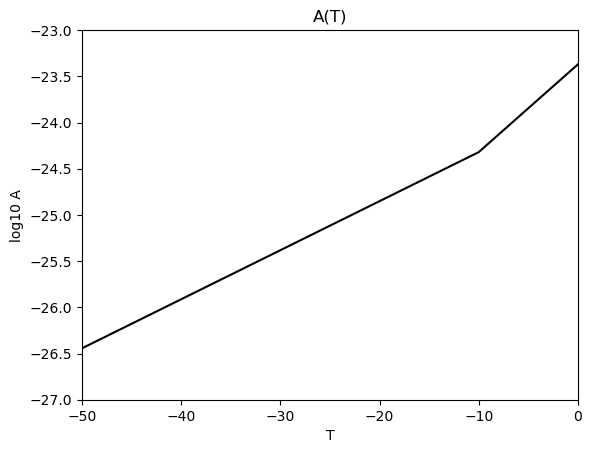

Caption: The glacial flow parameter A(T) as a function of temperatire T
Note this version uses line segments and is only approximate
Note also this code does not adjust for presure


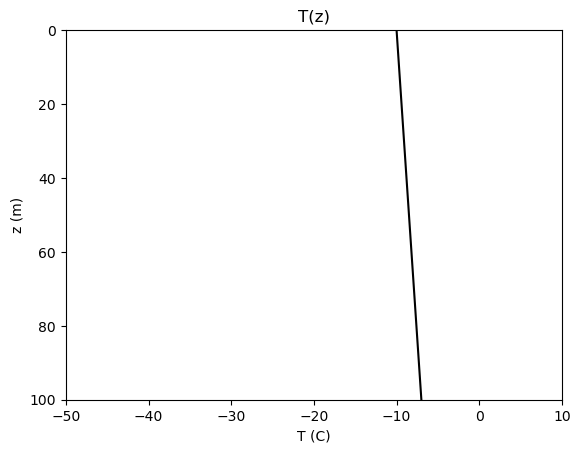

Caption: The temperature T as a function of depth z


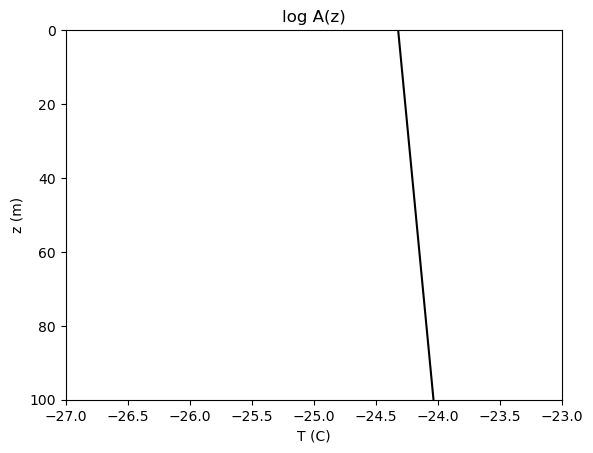

Caption: The temperature tau as a function of depth z


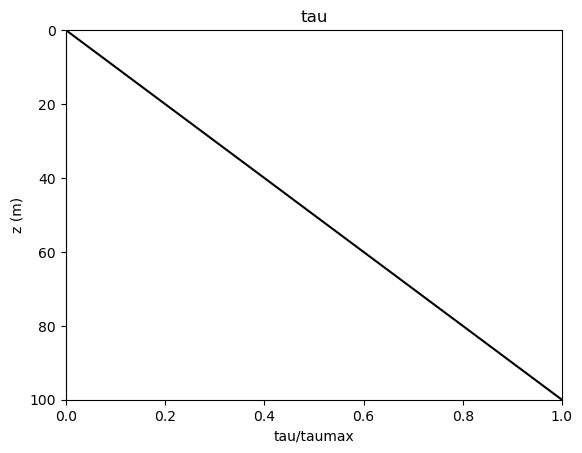

Caption: The shear stress tau as a function of depth z


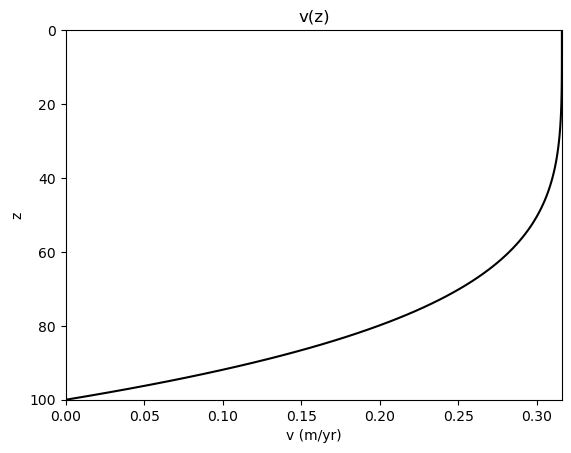

Caption: The velocity as a function of depth z


In [18]:
# Simulation  1
# this section exercizes the basic features of the glacier

# parameters that can be varied
zmax = 100.0;  # thickness of the glacier on meters
theta = 5.0;   # slope of the bedrock, in deg
grad = 30.0 / 1000.0 # geothermal gradient in degC per km
T0 = -10.0 # surface temperature in degC
rho = 917.0;  # density of ice in kg/m3
g = 9.81; # acceleration of gravity in m/s2
# end parameters that can be varied

# constant A n dv / sz = A tau**3
def AofT(T):
    if( (np.min(T)<(-50.0)) or (np.min(T)>0.0) ):
        print("Error: temperature out of allowable range of -50 to 0" );
        xxxx
    NT, i = np.shape(T);
    logA = np.zeros((NT,1));
    logA0 = -25.0 + 0.88/(5.18/4.0);
    C1 = (1.23/(5.18/4.0)) / 10.0;
    C2 = (2.75/(5.18/4.0)) / 40.0;
    T0 = -10.0;   # C
    for i in range(NT):
        Ti = T[i,0];
        if( Ti > (-10.0) ):
            logA[i,0] = logA0 + C1 * (Ti-T0);
        else:
            logA[i,0] = logA0 + C2 * (Ti-T0);
    return np.power(10.0*np.ones((NT,1)),logA);
    
# z-axis
Nz = 101;
zmin = 0.0;
Dz = (zmax-zmin)/(Nz-1);
z = gda_cvec( np.linspace(zmin,zmax,Nz) );

Tmin = -50.0;
Tmax = 0.0;
T = gda_cvec( np.linspace(Tmin,Tmax,Nz) );
A = AofT(T);
logA = np.log10(A);

fig1 = plt.figure();
ax1 = plt.subplot(1,1,1);
plt.axis( [-50, 0.0, -27, -23] );
plt.xlabel("T");
plt.ylabel("log10 A");
plt.plot(T,logA,'k-');
plt.title("A(T)");
plt.show();
print("Caption: The glacial flow parameter A(T) as a function of temperatire T");
print("Note this version uses line segments and is only approximate");
print("Note also this code does not adjust for presure");

# seconds in year
sinyr = 60*60*24*365.25;

# temperature
T = T0*np.ones((Nz,1))+grad*z;

fig1 = plt.figure();
ax1 = plt.subplot(1,1,1);
plt.axis( [-50, 10, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("T (C)");
plt.ylabel("z (m)");
plt.title("T(z)");
plt.plot(T,z,'k-');
plt.show();
print("Caption: The temperature T as a function of depth z");

# flow constant
A = AofT(T);
logA = np.log10(A);

fig1 = plt.figure();
ax1 = plt.subplot(1,1,1);
plt.axis( [-27, -23, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("T (C)");
plt.ylabel("z (m)");
plt.title("log A(z)");
plt.plot(logA,z,'k-');
plt.show();
print("Caption: The temperature tau as a function of depth z");

# force of gravity parallel to sloping surface
f = rho*g*sin(pi*theta/180.0)*np.ones((Nz,1));

# d tau / d z = - f
dtaudz = -f;
tau = gda_cvec( Dz*np.cumsum(dtaudz) );

# free surface boundary condition tau(z=0)=0;
tau = tau - tau[0,0];
taumax = np.max(np.abs(tau));

fig1 = plt.figure();
ax1 = plt.subplot(1,1,1);
ax1.invert_yaxis();
plt.axis( [0, 1, zmin, zmax] );
plt.plot([0,0],[zmin,zmax],'k:');
plt.xlabel("tau/taumax");
ax1.invert_yaxis();
plt.ylabel("z (m)");
plt.title("tau");
plt.plot(-tau/taumax,z,'k-');
plt.show();
print("Caption: The shear stress tau as a function of depth z");

# dvdz = A tau^3, and boundary condition v(0)=0
dvdz = np.multiply(A,np.power(tau,3));
v = gda_cvec( Dz*np.cumsum(dvdz) );
v = v-v[Nz-1,0];
vmax = np.max(v);

fig1 = plt.figure();
ax1 = plt.subplot(1,1,1);
plt.axis( [0, sinyr*vmax, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("v (m/yr)");
plt.ylabel("z");
plt.title("v(z)");
plt.plot(sinyr*v,z,'k-');
plt.show();
print("Caption: The velocity as a function of depth z");





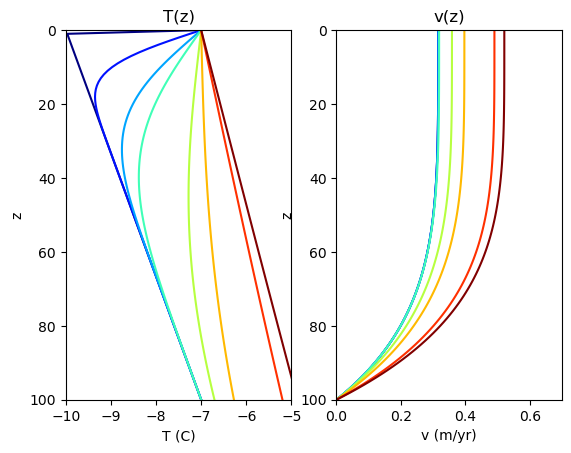

Caption. (left) Temperature T as s function of depth z, for different
times (colors, increasing from blue to red). (right) velocity v as a
function of depth z for different times (colors, increasing from blue to red).


In [19]:
# Simulation 2
# This glacier is warmed from the top

# parameters that can be varied
theta = 5.0;  # slope of glacier in deg
grad = 30.0 / 1000.0       # geothermal gradient in deg C per meter
T0 = -10.0                 # initial surface temperature in degC
Ts0 = 3.0;   # sudden increae of temperature of this amount in degC
Nz = 101;
# times in years; the interior of gda_cvec() is list of times
mytimes = gda_cvec( 0.001, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0 );
Tminplot = -10.0;  # minimum temperature on plots
Tmaxplot = -5.0;   # maximum temperature on plots
vmaxplot = 0.7;    # maximum velocity on plot in meters per year
# end parameters that can be varied

k = 2.22; # thermal conductivity of ice in W/(m·K)
rho = 917.0; # densitty of ice in kg/m3
g = 9.81; # acceleration of gravity in m/s2
cp = 2090.0; # heat capacity of ice in J/kg-K

# constant A n dv / sz = A tau**3
def AofT(T):
    if( (np.min(T)<(-50.0)) or (np.min(T)>0.0) ):
        print("Error: temperature out of allowable range of -50 to 0" );
        xxxx
    NT, i = np.shape(T);
    logA = np.zeros((NT,1));
    logA0 = -25.0 + 0.88/(5.18/4.0);
    C1 = (1.23/(5.18/4.0)) / 10.0;
    C2 = (2.75/(5.18/4.0)) / 40.0;
    T0 = -10.0;   # C
    for i in range(NT):
        Ti = T[i,0];
        if( Ti > (-10.0) ):
            logA[i,0] = logA0 + C1 * (Ti-T0);
        else:
            logA[i,0] = logA0 + C2 * (Ti-T0);
    return np.power(10.0*np.ones((NT,1)),logA);

# seconds in year
sinyr = 60*60*24*365.25;
mytimes = sinyr*sinyr;

# times;  the interior of gda_cvec is in years
mytimes = sinyr*gda_cvec( 0.001, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0 );
Nt, i = np.shape(mytimes);

# z-axis
zmin = 0.0;
zmax = 100.0;
Dz = (zmax-zmin)/(Nz-1);
z = gda_cvec( np.linspace(zmin,zmax,Nz) );

# tables of results
Tlist = np.zeros((Nz,Nt));
vlist = np.zeros((Nz,Nt));

for itime in range(Nt):
    mytime = mytimes[itime,0];

    # static temperature

    T = T0*np.ones((Nz,1))+grad*z;

    # step function increase in temperature
    kappa = k/(rho*cp);
    Ts = Ts0 * (np.ones((Nz,1))-sp.erf( z / sqrt( 4.0 * kappa * mytime ) ) );

    T = T + Ts;
    
    # flow constant
    A = AofT(T);
    logA = np.log10(A);

    # force of gravity parallel to sloping surface
    f = rho*g*sin(pi*theta/180.0)*np.ones((Nz,1));

    # d tau / d z = - f
    dtaudz = -f;
    tau = gda_cvec( Dz*np.cumsum(dtaudz) );

    # free surface boundary condition tau(z=0)=0;
    tau = tau - tau[0,0];
    taumax = np.max(np.abs(tau));

    # dvdz = A tau^3, and boundary condition v(0)=0
    dvdz = np.multiply(A,np.power(tau,3));
    v = gda_cvec( Dz*np.cumsum(dvdz) );
    v = v-v[Nz-1,0];

    Tlist[0:Nz,itime:itime+1] = T;
    vlist[0:Nz,itime:itime+1] = v;

vmax = np.max(sinyr*vlist);
Tmin = np.min(Tlist);
Tmax = np.max(Tlist);

jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=Nt-1);
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=jet);

fig1 = plt.figure();

ax1 = plt.subplot(1,2,1);
plt.axis( [Tminplot, Tmaxplot, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("T (C)");
plt.ylabel("z");
plt.title("T(z)");
for itime in range(Nt):
    colorVal = scalarMap.to_rgba(itime);
    plt.plot(Tlist[0:Nz,itime:itime+1],z,'-',color=colorVal);

ax1 = plt.subplot(1,2,2);
plt.axis( [0, vmaxplot, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("v (m/yr)");
plt.ylabel("z");
plt.title("v(z)");
for itime in range(Nt):
    colorVal = scalarMap.to_rgba(itime);
    plt.plot(sinyr*vlist[0:Nz,itime:itime+1],z,'-',color=colorVal);
plt.show();
print("Caption. (left) Temperature T as s function of depth z, for different");
print("times (colors, increasing from blue to red). (right) velocity v as a");
print("function of depth z for different times (colors, increasing from blue to red).");


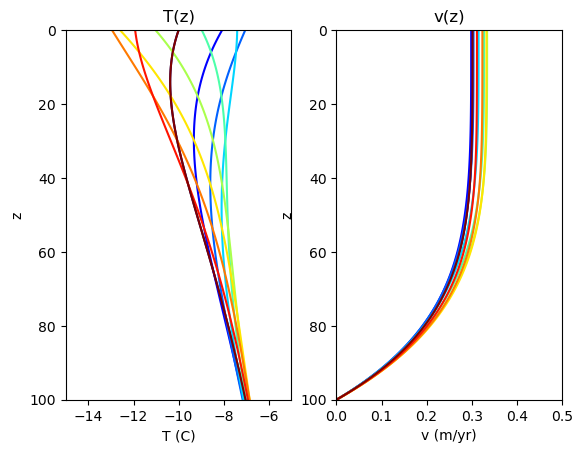

Caption. (left) Temperature T as s function of depth z, for different
times (colors, increasing from blue to red). (right) velocity v as a
function of depth z for different times (colors, increasing from blue to red).


In [20]:
# Simulation 3
# sinuoidally-varying surface temperature 

# parameters that can be varied
theta = 5.0;  # slope of glacier in deg
period = 100.0;   # period of sinusoid in years
Nt = 10;          # number of times per period top make a plot
grad = 30.0 / 1000.0       # geothermal gradient in deg C per meter
T0 = -10.0 # background surface temperature about whch sinusoidal flucuation occurs
Ts0 = 3.0; # amplitude of sunusoidal temperature at surface
Tminplot = -15.0;  # minimum temperature on plots
Tmaxplot = -5.0;   # maximum temperature on plots
vmaxplot = 0.5;    # maximum velocity on plot in meters per year
# end parameters that can be varied

k = 2.22; # thermal conductivity of ice in W/(m·K)
rho = 917.0; # density of ice in kg/m3
cp = 2090.0; # heat capacity of ice in J/kg-K

# ----------------- no changes below here

# seconds in year
sinyr = 60*60*24*365.25;
# force of gravity parallel to sloping surface
g = 9.81; # acceleration of gravity in m/s2

period = sinyr*period;
w = 2*pi/period; # angular frequency

# constant A n dv / sz = A tau**3
def AofT(T):
    if( (np.min(T)<(-50.0)) or (np.min(T)>0.0) ):
        print("Error: temperature out of allowable range of -50 to 0" );
        xxxx
    NT, i = np.shape(T);
    logA = np.zeros((NT,1));
    logA0 = -25.0 + 0.88/(5.18/4.0);
    C1 = (1.23/(5.18/4.0)) / 10.0;
    C2 = (2.75/(5.18/4.0)) / 40.0;
    T0 = -10.0;   # C
    for i in range(NT):
        Ti = T[i,0];
        if( Ti > (-10.0) ):
            logA[i,0] = logA0 + C1 * (Ti-T0);
        else:
            logA[i,0] = logA0 + C2 * (Ti-T0);
    return np.power(10.0*np.ones((NT,1)),logA);

# periof of oscillation, in years converted to seconds
w = 2*pi/period; # angular frequency
Nt = 10; # number of times
mytimes = gda_cvec( np.linspace(0.0,period,Nt)  );
Nt, i = np.shape(mytimes);

# z-axis
Nz = 101;
zmin = 0.0;
zmax = 100.0;
Dz = (zmax-zmin)/(Nz-1);
z = gda_cvec( np.linspace(zmin,zmax,Nz) );

# tables of results
Tlist = np.zeros((Nz,Nt));
vlist = np.zeros((Nz,Nt));

for itime in range(Nt):
    mytime = mytimes[itime,0];

    # static temperature
    T = T0*np.ones((Nz,1))+grad*z;

    # periodic function of temperature, sin(wt) at surface
    kappa = k/(rho*cp);
    fac = sqrt( w / (2.0*kappa) );
    ph = w*mytime*np.ones((Nz,1)) - z * fac;
    Ts = Ts0 * np.exp(-z*fac) * np.sin(ph);

    T = T + Ts;
    
    # flow constant
    A = AofT(T);
    logA = np.log10(A);
    
    f = rho*g*sin(pi*theta/180.0)*np.ones((Nz,1));

    # d tau / d z = - f
    dtaudz = -f;
    tau = gda_cvec( Dz*np.cumsum(dtaudz) );

    # free surface boundary condition tau(z=0)=0;
    tau = tau - tau[0,0];
    taumax = np.max(np.abs(tau));

    # dvdz = A tau^3, and boundary condition v(0)=0
    dvdz = np.multiply(A,np.power(tau,3));
    v = gda_cvec( Dz*np.cumsum(dvdz) );
    v = v-v[Nz-1,0];

    Tlist[0:Nz,itime:itime+1] = T;
    vlist[0:Nz,itime:itime+1] = v;

vmax = np.max(sinyr*vlist);
Tmin = np.min(Tlist);
Tmax = np.max(Tlist);

jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=Nt-1);
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=jet);

fig1 = plt.figure();

ax1 = plt.subplot(1,2,1);
plt.axis( [Tminplot, Tmaxplot, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("T (C)");
plt.ylabel("z");
plt.title("T(z)");
for itime in range(Nt):
    colorVal = scalarMap.to_rgba(itime);
    plt.plot(Tlist[0:Nz,itime:itime+1],z,'-',color=colorVal);

ax1 = plt.subplot(1,2,2);
plt.axis( [0, vmaxplot, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("v (m/yr)");
plt.ylabel("z");
plt.title("v(z)");
for itime in range(Nt):
    colorVal = scalarMap.to_rgba(itime);
    plt.plot(sinyr*vlist[0:Nz,itime:itime+1],z,'-',color=colorVal);
plt.show();
print("Caption. (left) Temperature T as s function of depth z, for different");
print("times (colors, increasing from blue to red). (right) velocity v as a");
print("function of depth z for different times (colors, increasing from blue to red).");


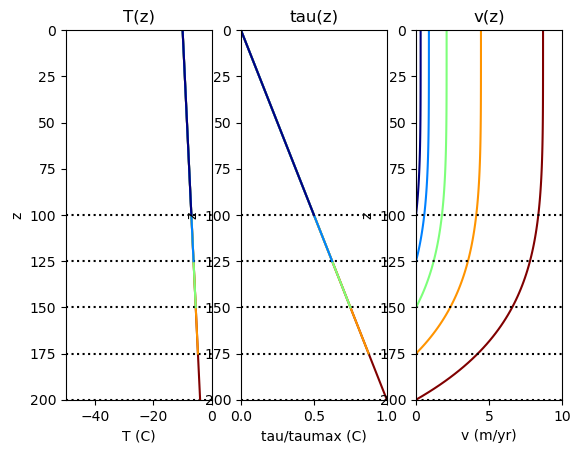

Caption. (left) Temperature T in degC as a function od depth z in meters
(middle) hear stress tau as s function of depth z, for different glacial
thcknesses (colors, increasing from blue to red). (right) velocity v as a
function of depth z for different glacial thickneses (colors, increasing
from blue to red). Bottoms of glaciers are also shown (dotted).


In [21]:
# Simulation 4
# glaciers of differenting thickness

# parameters that can be varied
theta = 5.0;  # slope of glacier in deg
grad = 30.0 / 1000.0       # geothermal gradient in deg C per meter
T0 = -10.0                 # surface temperature in deg C
g = 9.81;                  # acceleration of gravity in m/s2
Nz = 101;
# thicknesses myh:  the interior of gda_cvec is in meters
myh = gda_cvec( 100.0, 125.0, 150.0, 175.0, 200.0 );
vmaxplot = 10.0; # maximum velocity plotted, in meters per year
# end parameters that can be varied

rho = 917.0; # densitty of ice in kg/m3

# ----------- no changes below here  -----------------------

# constant A n dv / sz = A tau**3
def AofT(T):
    if( (np.min(T)<(-50.0)) or (np.min(T)>0.0) ):
        print("Error: temperature out of allowable range of -50 to 0" );
        xxxx
    NT, i = np.shape(T);
    logA = np.zeros((NT,1));
    logA0 = -25.0 + 0.88/(5.18/4.0);
    C1 = (1.23/(5.18/4.0)) / 10.0;
    C2 = (2.75/(5.18/4.0)) / 40.0;
    T0 = -10.0;   # C
    for i in range(NT):
        Ti = T[i,0];
        if( Ti > (-10.0) ):
            logA[i,0] = logA0 + C1 * (Ti-T0);
        else:
            logA[i,0] = logA0 + C2 * (Ti-T0);
    return np.power(10.0*np.ones((NT,1)),logA);

# seconds in year
sinyr = 60*60*24*365.25;
mytimes = sinyr*sinyr;

# thickness
Nh, i = np.shape(myh);

# tables of results
zlist = np.zeros((Nz,Nh));
vlist = np.zeros((Nz,Nh));
taulist = np.zeros((Nz,Nh));
Tlist = np.zeros((Nz,Nh));

for ih in range(Nh):

    # z-axis
    zmin = 0.0;
    zmax = myh[ih,0];
    Dz = (zmax-zmin)/(Nz-1);
    z = gda_cvec( np.linspace(zmin,zmax,Nz) );

    # static temperature

    T = T0*np.ones((Nz,1))+grad*z;
    
    # flow constant
    A = AofT(T);
    logA = np.log10(A);

    # force of gravity parallel to sloping surface
    f = rho*g*sin(pi*theta/180.0)*np.ones((Nz,1));

    # d tau / d z = - f
    dtaudz = -f;
    tau = gda_cvec( Dz*np.cumsum(dtaudz) );

    # free surface boundary condition tau(z=0)=0;
    tau = tau - tau[0,0];
    taumax = np.max(np.abs(tau));

    # dvdz = A tau^3, and boundary condition v(0)=0
    dvdz = np.multiply(A,np.power(tau,3));
    v = gda_cvec( Dz*np.cumsum(dvdz) );
    v = v-v[Nz-1,0];

    zlist[0:Nz,ih:ih+1] = z;
    Tlist[0:Nz,ih:ih+1] = T;
    taulist[0:Nz,ih:ih+1] = tau;
    vlist[0:Nz,ih:ih+1] = v;

zmin = 0.0;
zmax = np.max(zlist);
vmax = np.max(sinyr*vlist);
taumax = np.max(np.abs(taulist));

jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=Nh-1);
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=jet);

fig1 = plt.figure();

ax1 = plt.subplot(1,3,1);
plt.axis( [-50.0, 0.0, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("T (C)");
plt.ylabel("z");
plt.title("T(z)");
for ih in reversed(range(Nh)):
    colorVal = scalarMap.to_rgba(ih);
    plt.plot( [-50.0, 0.0], [zlist[Nz-1,ih], zlist[Nz-1,ih]], 'k:');
    plt.plot(Tlist[0:Nz,ih:ih+1],zlist[0:Nz,ih:ih+1],'-',color=colorVal);

ax1 = plt.subplot(1,3,2);
plt.axis( [0.0, 1.0, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("tau/taumax (C)");
plt.ylabel("z");
plt.title("tau(z)");
for ih in reversed(range(Nh)):
    colorVal = scalarMap.to_rgba(ih);
    plt.plot( [0, 1.0], [zlist[Nz-1,ih], zlist[Nz-1,ih]], 'k:');
    plt.plot(-taulist[0:Nz,ih:ih+1]/taumax,zlist[0:Nz,ih:ih+1],'-',color=colorVal);

ax1 = plt.subplot(1,3,3);
plt.axis( [0, vmaxplot, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("v (m/yr)");
plt.ylabel("z");
plt.title("v(z)");
for ih in reversed(range(Nh)):
    colorVal = scalarMap.to_rgba(ih);
    plt.plot( [0, sinyr*vmax], [zlist[Nz-1,ih], zlist[Nz-1,ih]], 'k:');
    plt.plot(sinyr*vlist[0:Nz,ih:ih+1],zlist[0:Nz,ih:ih+1],'-',color=colorVal);
plt.show();
print("Caption. (left) Temperature T in degC as a function od depth z in meters")
print("(middle) hear stress tau as s function of depth z, for different glacial");
print("thcknesses (colors, increasing from blue to red). (right) velocity v as a");
print("function of depth z for different glacial thickneses (colors, increasing");
print("from blue to red). Bottoms of glaciers are also shown (dotted).");



0.5634577597623731


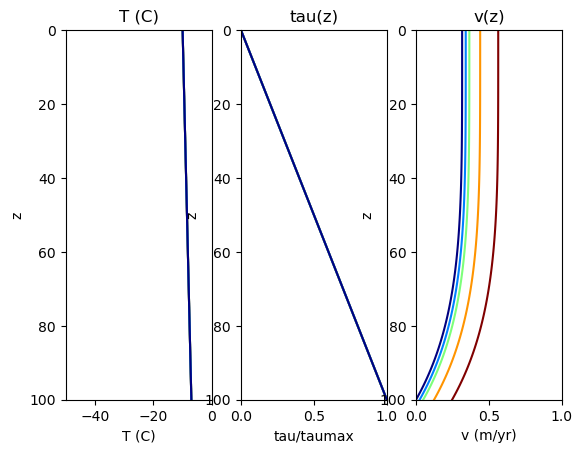

Caption. (left) temperature T as a functoion of depth z. (middle)
shear stress tau as s function of depth z, for different basal sliding
coefficients (colors, increasing from blue to red). (right) velocity v as a
function of depth z for different glacial glacial sliding coeffficients (colors, increasing
from blue to red).


In [22]:
# Simulation 5
# This version allows for basal sliding
# using a linear law velocity = C shear stress
# the parameter C is varied

# parameters that can be varied
theta = 5.0;  # slope of glacier in deg
grad = 30.0 / 1000.0       # geothermal gradient in deg C per meter
T0 = -10.0                 # initial surface temperature
g = 9.81; # acceeleration of gravity in m/s2
# list myC of basal sliding parameters:
myC = gda_cvec( 0.0, 1.0e-14, 2.0e-14, 5.0e-14, 10.0e-14 );
vmaxplot = 1.0;  # maximum velocity plotted in m/yr
Nz = 101;
# end parameters that can be varied

rho = 917.0; # densitty of ice in kg/m3
zmax = 100.0; # thickness of glacier in m

# constant A n dv / sz = A tau**3
def AofT(T):
    if( (np.min(T)<(-50.0)) or (np.min(T)>0.0) ):
        print("Error: temperature out of allowable range of -50 to 0" );
        xxxx
    NT, i = np.shape(T);
    logA = np.zeros((NT,1));
    logA0 = -25.0 + 0.88/(5.18/4.0);
    C1 = (1.23/(5.18/4.0)) / 10.0;
    C2 = (2.75/(5.18/4.0)) / 40.0;
    T0 = -10.0;   # C
    for i in range(NT):
        Ti = T[i,0];
        if( Ti > (-10.0) ):
            logA[i,0] = logA0 + C1 * (Ti-T0);
        else:
            logA[i,0] = logA0 + C2 * (Ti-T0);
    return np.power(10.0*np.ones((NT,1)),logA);

# seconds in year
sinyr = 60*60*24*365.25;
mytimes = sinyr*sinyr;

# number of basal sliding coefficients
NC, i = np.shape(myC);

# z-axis
zmin = 0.0;
Dz = (zmax-zmin)/(Nz-1);
z = gda_cvec( np.linspace(zmin,zmax,Nz) );

# tables of results
vlist = np.zeros((Nz,NC));
taulist = np.zeros((Nz,NC));
Tlist = np.zeros((Nz,NC));

for iC in range(NC):

    # basal sliding coefficient
    C = myC[iC,0];

    # static temperature
    T = T0*np.ones((Nz,1))+grad*z;
    
    # flow constant
    A = AofT(T);
    logA = np.log10(A);

    # force of gravity parallel to sloping surface
    f = rho*g*sin(pi*theta/180.0)*np.ones((Nz,1));

    # d tau / d z = - f
    dtaudz = -f;
    tau = gda_cvec( Dz*np.cumsum(dtaudz) );

    # free surface boundary condition tau(z=0)=0;
    tau = tau - tau[0,0];
    taumax = np.max(np.abs(tau));

    # basal sliding velocity
    vbasal = C * taumax;
    
    # dvdz = A tau^3, and boundary condition v(0)=0
    dvdz = np.multiply(A,np.power(tau,3));
    v = gda_cvec( Dz*np.cumsum(dvdz) );
    v = v-v[Nz-1,0]+vbasal;

    Tlist[0:Nz,iC:iC+1] = T;
    taulist[0:Nz,iC:iC+1] = tau;
    vlist[0:Nz,iC:iC+1] = v;

vmax = np.max(vlist);
print(sinyr*vmax);
taumax = np.max(np.abs(taulist));
Tmax = np.max(Tlist);

jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=NC-1);
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=jet);

fig1 = plt.figure();

ax1 = plt.subplot(1,3,1);
plt.axis( [-50, 0.0, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("T (C)");
plt.ylabel("z");
plt.title("T (C)");
for iC in reversed(range(NC)):
    colorVal = scalarMap.to_rgba(iC);
    plt.plot(Tlist[0:Nz,iC:iC+1],z,'-',color=colorVal);

ax1 = plt.subplot(1,3,2);
plt.axis( [0.0, 1.0, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("tau/taumax");
plt.ylabel("z");
plt.title("tau(z)");
for iC in reversed(range(NC)):
    colorVal = scalarMap.to_rgba(iC);
    plt.plot(-taulist[0:Nz,iC:iC+1]/taumax,z,'-',color=colorVal);

ax1 = plt.subplot(1,3,3);
plt.axis( [0, vmaxplot, zmin, zmax] );
ax1.invert_yaxis();
plt.xlabel("v (m/yr)");
plt.ylabel("z");
plt.title("v(z)");
for iC in reversed(range(NC)):
    colorVal = scalarMap.to_rgba(iC);
    plt.plot(sinyr*vlist[0:Nz,iC:iC+1],z,'-',color=colorVal);
plt.show();
print("Caption. (left) temperature T as a functoion of depth z. (middle)");
print("shear stress tau as s function of depth z, for different basal sliding");
print("coefficients (colors, increasing from blue to red). (right) velocity v as a");
print("function of depth z for different glacial glacial sliding coeffficients (colors, increasing");
print("from blue to red).");